# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = # YOUR CODE HERE
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()



        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | salacgriva
Processing Record 2 of Set 1 | alva
Processing Record 3 of Set 1 | biryusinsk
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | klyuchi
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | noshiro
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | chonchi
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | praya
Processing Record 14 of Set 1 | la junta
Processing Record 15 of Set 1 | daru
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | naze
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | antsiranana
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | punta arenas
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# After your loop that appends data to city_data, print out the first few entries
print(city_data[:5])  # Print the first 5 entries to check them

# Convert the city_data list to a DataFrame
city_data_df = pd.DataFrame(city_data)

# Check the DataFrame structure
print(city_data_df.head())

# Extract "Lat" column if it exists
if "Lat" in city_data_df.columns:
    lats = city_data_df["Lat"]
else:
    print("Lat column does not exist in the DataFrame.")
    
# Extract specific columns
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Show Record Count
city_data_df.count()

# Show Record Count
city_data_df.count()

[{'City': 'salacgriva', 'Lat': 57.7536, 'Lng': 24.3581, 'Max Temp': 6.42, 'Humidity': 95, 'Cloudiness': 100, 'Wind Speed': 5.06, 'Country': 'LV', 'Date': 1712079017}, {'City': 'alva', 'Lat': 56.1528, 'Lng': -3.8051, 'Max Temp': 7.96, 'Humidity': 97, 'Cloudiness': 100, 'Wind Speed': 2.9, 'Country': 'GB', 'Date': 1712079018}, {'City': 'biryusinsk', 'Lat': 55.9634, 'Lng': 97.8235, 'Max Temp': -1.87, 'Humidity': 90, 'Cloudiness': 98, 'Wind Speed': 1.47, 'Country': 'RU', 'Date': 1712079019}, {'City': 'hermanus', 'Lat': -34.4187, 'Lng': 19.2345, 'Max Temp': 16, 'Humidity': 77, 'Cloudiness': 46, 'Wind Speed': 3.05, 'Country': 'ZA', 'Date': 1712079020}, {'City': 'klyuchi', 'Lat': 52.2667, 'Lng': 79.1667, 'Max Temp': 1.45, 'Humidity': 96, 'Cloudiness': 100, 'Wind Speed': 2.81, 'Country': 'RU', 'Date': 1712079021}]
         City      Lat      Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0  salacgriva  57.7536  24.3581      6.42        95         100        5.06   
1        alva  56.1528  -

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,salacgriva,57.7536,24.3581,6.42,95,100,5.06,LV,1712079017
1,alva,56.1528,-3.8051,7.96,97,100,2.90,GB,1712079018
2,biryusinsk,55.9634,97.8235,-1.87,90,98,1.47,RU,1712079019
3,hermanus,-34.4187,19.2345,16.00,77,46,3.05,ZA,1712079020
4,klyuchi,52.2667,79.1667,1.45,96,100,2.81,RU,1712079021


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salacgriva,57.7536,24.3581,6.42,95,100,5.06,LV,1712079017
1,alva,56.1528,-3.8051,7.96,97,100,2.90,GB,1712079018
2,biryusinsk,55.9634,97.8235,-1.87,90,98,1.47,RU,1712079019
3,hermanus,-34.4187,19.2345,16.00,77,46,3.05,ZA,1712079020
4,klyuchi,52.2667,79.1667,1.45,96,100,2.81,RU,1712079021


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

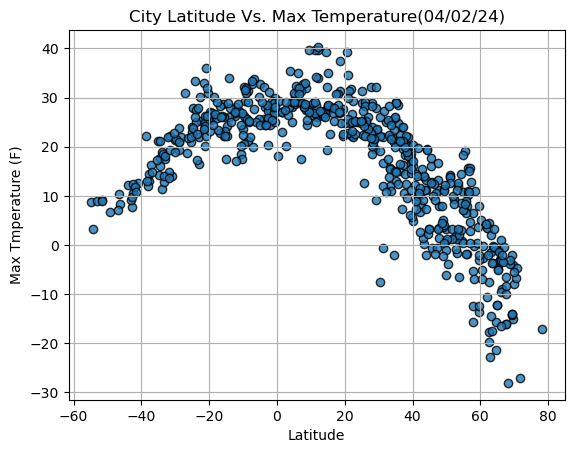

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidth=1,marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Tmperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

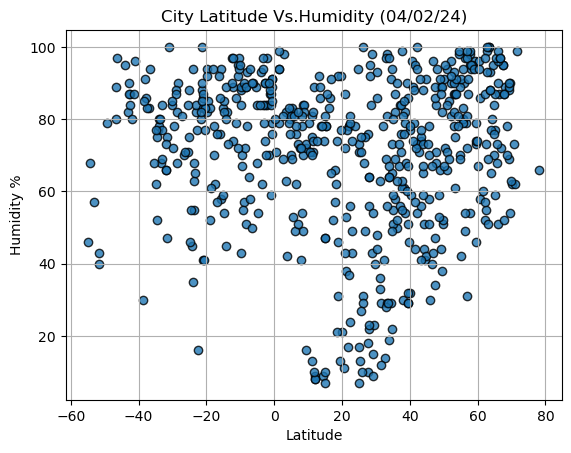

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor="black", linewidth=1,marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs.Humidity (%s)" %time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

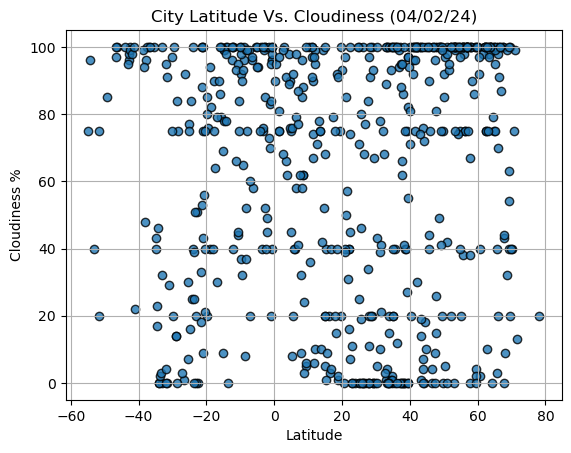

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidth=1,marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (%s)" %time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

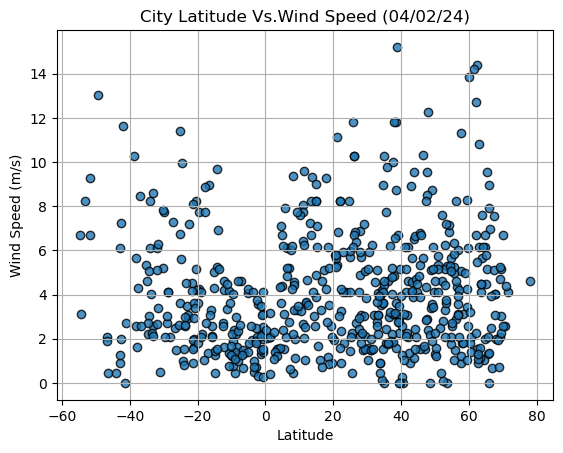

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidth=1,marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs.Wind Speed (%s)" %time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
    regress_values=x_values*slope+intercept
    line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

    # Plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salacgriva,57.7536,24.3581,6.42,95,100,5.06,LV,1712079017
1,alva,56.1528,-3.8051,7.96,97,100,2.90,GB,1712079018
2,biryusinsk,55.9634,97.8235,-1.87,90,98,1.47,RU,1712079019
4,klyuchi,52.2667,79.1667,1.45,96,100,2.81,RU,1712079021
6,noshiro,40.2039,140.0242,4.84,77,71,0.26,JP,1712079026


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,hermanus,-34.4187,19.2345,16.00,77,46,3.05,ZA,1712079020
5,port-aux-francais,-49.3500,70.2167,6.76,79,85,13.02,TF,1712079022
7,luderitz,-26.6481,15.1594,18.73,70,1,2.49,NaN,1712079027
8,chonchi,-42.6128,-73.8092,10.56,87,100,7.25,CL,1712079028
11,ushuaia,-54.8000,-68.3000,8.81,46,75,6.69,AR,1712078992


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7554532448702688


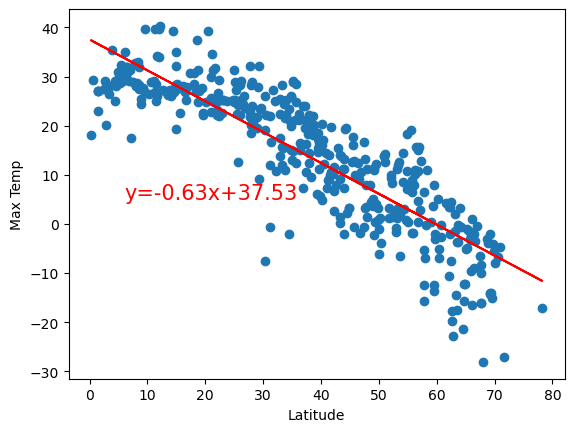

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6,5))


#In this case, an r-squared of 0.755 is relatively high, suggesting that approximately 75.5% of the variation in maximum temperature can be explained by the latitude.
#Overall, the plot demonstrates a moderately strong inverse relationship between latitude and maximum temperature, indicating that latitude is a significant predictor of maximum temperature in this dataset.

The r-squared is: 0.6113981130498808


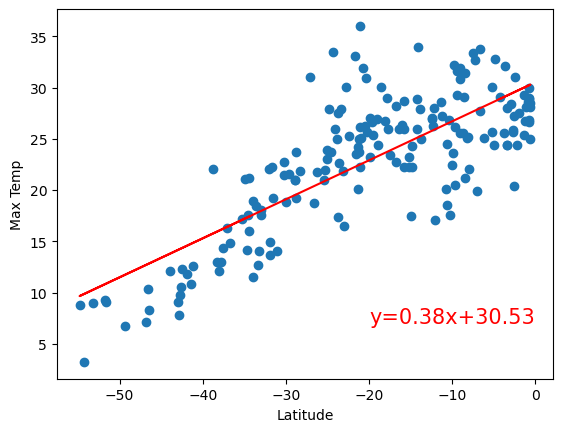

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-20,7))


**Discussion about the linear relationship:**  The r-squared value is approximately 0.612. This indicates that about 61.2% of the variability in the maximum temperature can be explained by the latitude in this model. Although this is a significant portion, it's lower than the r-squared value from the previous image, suggesting that the relationship between latitude and maximum temperature in this data set is somewhat less strong.

In summary, the plot shows a moderate positive linear relationship between latitude and maximum temperature for this subset of data, focusing on latitudes in the southern hemisphere moving towards the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.06826202726492402


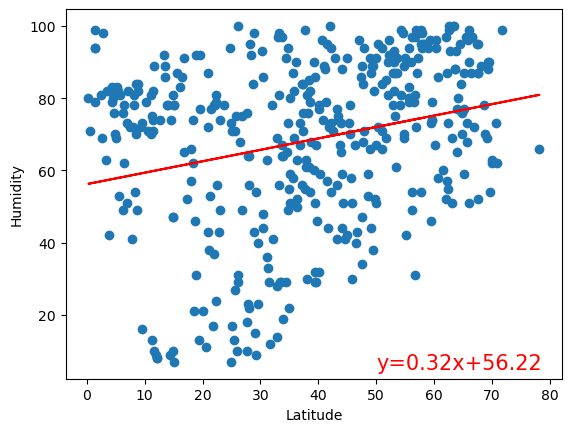

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values,'Humidity',(50,5))
#resize

**The r-squared value is approximately 0.0686, which indicates that around 6.86% of the variation in humidity can be explained by the latitude. While there is a positive trend, the low r-squared value indicates that latitude alone is not a strong predictor of humidity, and there is substantial variability in humidity that is not captured by latitude alone.

The wide spread of data points around the regression line confirms that the correlation between latitude and humidity is relatively weak. Other factors not shown on this scatter plot may have a significant impact on humidity.

The r-squared is: 0.026237729772769613


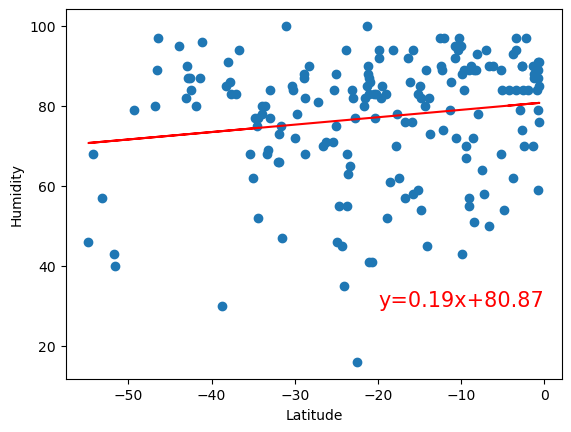

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-20,30))

**Discussion about the linear relationship:** The r-squared value is approximately 0.026, which is quite low. This suggests that only about 2.6% of the variation in humidity can be explained by latitude according to this model. With such a low r-squared value, the model does not provide a strong predictive relationship between latitude and humidity.

The scatter plot shows a wide dispersion of points around the regression line, which supports the low r-squared value indicating a weak correlation. In summary, while there is a slight positive relationship, latitude is not a strong predictor of humidity based on this data set.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.028821632162179152


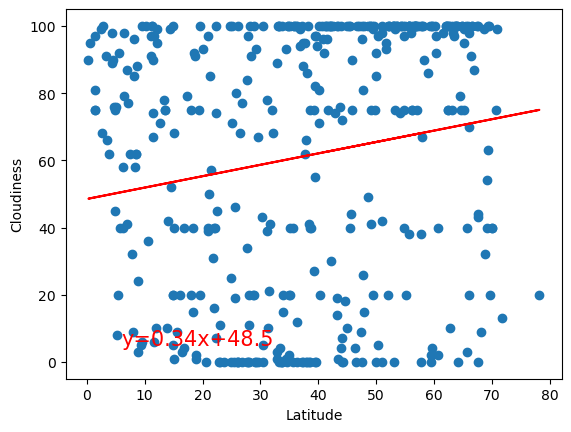

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (6,5))

**The r-squared value is approximately 0.0288, which indicates that only about 2.88% of the variability in cloudiness can be accounted for by the latitude. This low r-squared value means that while there is a positive relationship, it is weak, and latitude alone does not strongly predict cloudiness. There's a lot of scatter around the regression line, further supporting the conclusion that other factors, in addition to latitude, significantly influence cloudiness.

The r-squared is: 0.023203423573216787


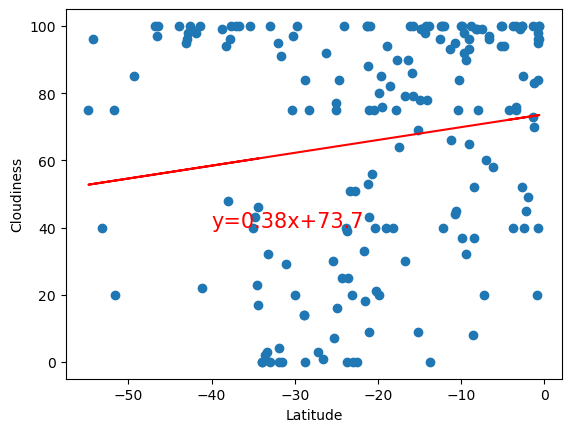

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-40,40))

**Discussion about the linear relationship:** The r-squared value, which measures the strength of the correlation, is approximately 0.023. This is quite low and suggests that only about 2.3% of the variability in cloudiness can be explained by latitude based on this model. This implies that while there is a positive trend, the relationship between latitude and cloudiness is very weak.

The data points are broadly scattered across the range of latitudes, without a strong pattern following the regression line, further emphasizing the weak predictive power of latitude in relation to cloudiness as indicated by the low r-squared value. There are likely other factors, not included in this simple linear model, that have a more significant impact on cloudiness.






### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0007108386751270541


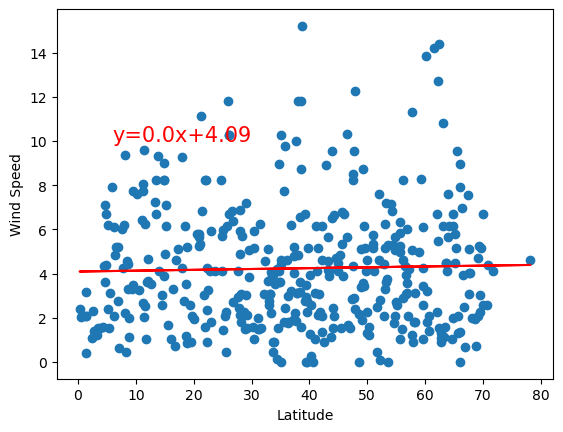

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (6,10))

**Discussion about the linear relationship:** The r-squared value of approximately 0.0007 is extremely low, indicating that less than 0.1% of the variation in wind speed can be explained by latitude based on this data. Essentially, this r-squared value suggests there is no meaningful correlation between latitude and wind speed as presented in the dataset.
The visual representation confirms this, with the data points widely dispersed across all values of latitude and no discernible pattern that would indicate a relationship. The plot, therefore, suggests that latitude is not a good predictor of wind speed for these locations.

The r-squared is: 0.14111240236173211


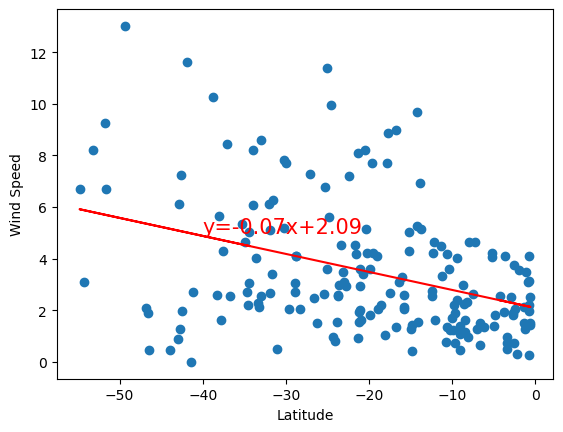

In [34]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-40,5))

**The r-squared value is approximately 0.1411, which means that roughly 14.11% of the variability in wind speed can be explained by the latitude based on this linear model. While this is a small percentage, it does indicate that there is a slight tendency for wind speed to decrease as one moves northwards from the southern hemisphere to the equator in this dataset.

However, the relationship is not very strong, as evidenced by the r-squared value, and there is a significant amount of scatter away from the regression line, indicating that other factors beyond latitude likely have an impact on wind speed as well.s.